## Count Vectorizer:
Count Vectorizer converts a collection of text documents into a matrix of token counts. Each document is represented by a vector where each element corresponds to the count of a particular word (token) in that document
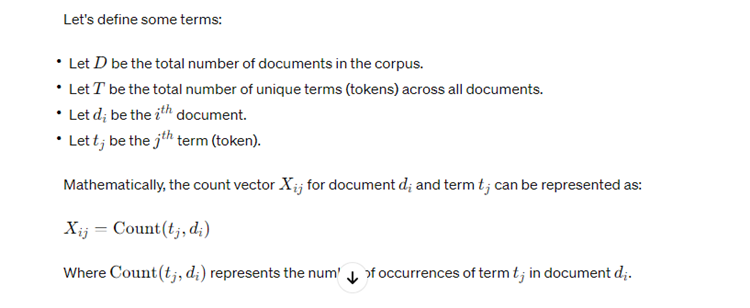

## TF-IDF (Term Frequency-Inverse Document Frequency):
- TF-IDF reflects the importance of a term in a document relative to its frequency in the entire corpus. It combines two components: Term Frequency (TF) and Inverse Document Frequency (IDF).

**Term Frequency (TF)**:
Term frequency is a measure of how often a term appears in a document. It is calculated as the ratio of the number of times a term appears in a document to the total number of terms in that document.

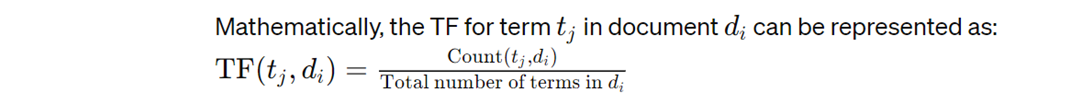

## Inverse Document Frequency 
This measures the rarity of a term across all documents in the corpus. It is calculated as the logarithm of the ratio of the total number of documents to the number of documents containing the term, with a smoothing term to handle the case when the term doesn't appear in any document.

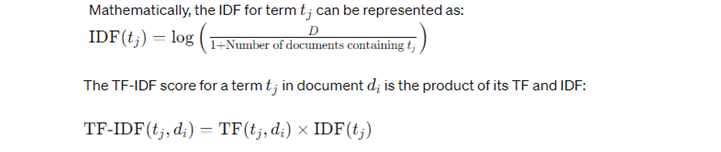
This gives higher weight to terms that are frequent within a document but rare across all documents, effectively highlighting their importance in representing the content of the document.

In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Sample text data
corpus = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?",
]

# Using CountVectorizer
count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(corpus)
type(X_count)

scipy.sparse._csr.csr_matrix

In [2]:

print("Count Vectorizer Matrix:")
print(X_count.toarray())  # Convert the sparse matrix to array for better visibility
print("Vocabulary:")
print(count_vectorizer.get_feature_names_out())
print()

Count Vectorizer Matrix:
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]
Vocabulary:
['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']



In [3]:

# Using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(corpus)

print("TF-IDF Vectorizer Matrix:")
print(X_tfidf.toarray())  # Convert the sparse matrix to array for better visibility
print("Vocabulary:")
print(tfidf_vectorizer.get_feature_names_out())


TF-IDF Vectorizer Matrix:
[[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.         0.6876236  0.         0.28108867 0.         0.53864762
  0.28108867 0.         0.28108867]
 [0.51184851 0.         0.         0.26710379 0.51184851 0.
  0.26710379 0.51184851 0.26710379]
 [0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]
Vocabulary:
['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


### Quick Practice 
 Data for CountVectorization:
- "Ashi is happy to work in Gurgoan. Work brings happiness to Ashi."
- "Happy people work better in Gurgoan. Ashi enjoys the work culture here."
- "The work environment in her company makes Ashi  very happy."
- "Happiness comes from working hard and work life balance"

Lab Questions:
- Apply CountVectorization to the provided text data and answer the following:
- Display the Count Vectorizer Matrix.
- Display the Vocabulary.
- Identify the term with the highest frequency.
- Which term(s) occur in all sentences?
- Explain how the frequency of the word 'happy' changes across the sentences.
- What would happen if we set stop_words='english' in the CountVectorizer?

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Provided text data
text_data = [
"Ashi is happy to work in Gurgoan. Work brings happiness to Ashi."
"Happy people work better in Gurgoan. Ashi enjoys the work culture here."
"The work environment in her company makes Ashi  very happy."
"Happiness comes from working hard and work life balance"
]

# Step 1: Initialize CountVectorizer
count_vectorizer = CountVectorizer()

# Step 2: Fit and transform the text data
X_count = count_vectorizer.fit_transform(text_data)

# Step 3: Display Count Vectorizer Matrix
print("Count Vectorizer Matrix:")
print(X_count.toarray())  # Convert the sparse matrix to an array for better visibility

# Step 4: Display Vocabulary
print("\nVocabulary:")
print(count_vectorizer.get_feature_names_out())

# Step 5: Identify Term with the Highest Frequency
term_frequencies = X_count.sum(axis=0).A1  # Convert sparse matrix to array
most_frequent_word = count_vectorizer.get_feature_names_out()[term_frequencies.argmax()]
print("\nTerm with the Highest Frequency:", most_frequent_word)

# Step 6: Identify Terms Occurring in All Sentences
common_terms = count_vectorizer.get_feature_names_out()[(X_count.toarray() > 0).all(axis=0)]
print("\nTerms Occurring in All Sentences:", common_terms)

# Step 7: Frequency of the Word 'happy'
happy_index = list(count_vectorizer.get_feature_names_out()).index('happy')
print("\nFrequency of 'happy' Across Sentences:", X_count.toarray()[:, happy_index])

# Step 8: Effect of Removing Stop Words
count_vectorizer_stop = CountVectorizer(stop_words='english')
X_count_stop = count_vectorizer_stop.fit_transform(text_data)
print("\nVocabulary without Stop Words:")
print(count_vectorizer_stop.get_feature_names_out())
